In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [4]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM useducation', con = engine)

engine.dispose()


df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [5]:
need_to_fill = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]
states = df['STATE'].unique()
for state in states:
    df.loc[df['STATE'] == state, need_to_fill] = df.loc[df['STATE'] == state, need_to_fill].interpolate()
    
df.dropna(inplace = True)

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,...,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,...,52524.0,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154


In [6]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


## States run education at a loss

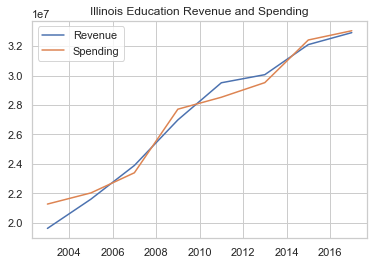

In [14]:
plt.plot(df.loc[df.STATE =='ILLINOIS', 'YEAR'],
         df.loc[df.STATE =='ILLINOIS', 'TOTAL_REVENUE'], label = 'Revenue')
plt.plot(df.loc[df.STATE =='ILLINOIS', 'YEAR'],
         df.loc[df.STATE =='ILLINOIS', 'TOTAL_EXPENDITURE'], label = 'Spending')
plt.title('Illinois Education Revenue and Spending')
plt.legend()
plt.show()

In [18]:
more_math4 = print(df.loc[df.STATE == 'ILLINOIS', 'AVG_READING_4_SCORE']- df.loc[df.STATE == 'ILLINOIS', 'AVG_MATH_4_SCORE'])
more_math8 = print(df.loc[df.STATE == 'ILLINOIS', 'AVG_READING_8_SCORE']- df.loc[df.STATE == 'ILLINOIS', 'AVG_MATH_8_SCORE'])

585    -16.552487
689    -16.577774
793    -17.900230
901    -19.119889
1006   -19.479381
1110   -20.460020
1212   -15.285546
1460   -17.753049
dtype: float64
585     -9.942006
689    -11.662874
793    -39.703471
901     -9.972101
1006   -21.106760
1110   -20.281934
1212   -24.618127
1460   -11.944902
dtype: float64


## Illinois is much more successful at math than reading

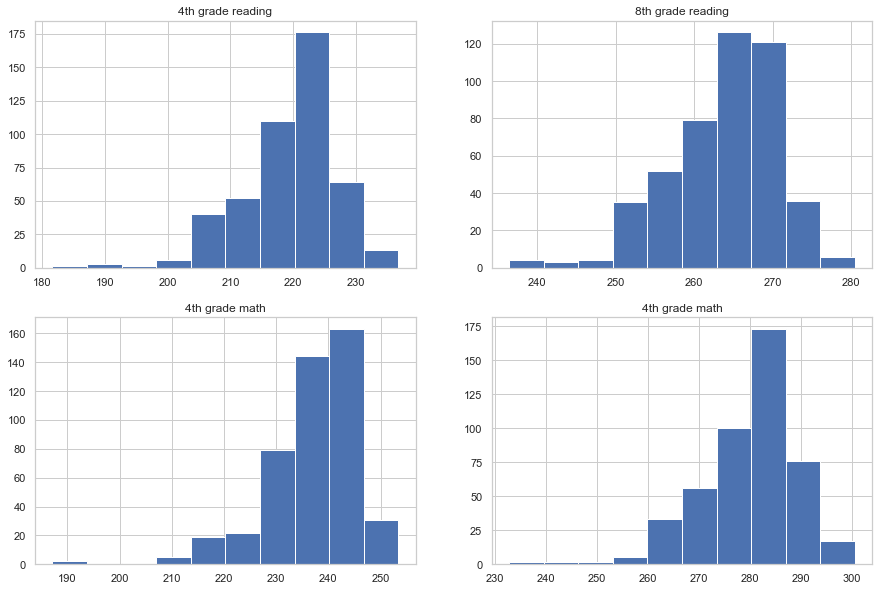

In [21]:
plt.figure(figsize = (15, 10))



plt.subplot(2,2,1)
plt.hist(df.AVG_READING_4_SCORE.dropna())
plt.title('4th grade reading')

plt.subplot(2,2,2)
plt.hist(df.AVG_READING_8_SCORE.dropna())
plt.title('8th grade reading')



plt.subplot(2,2,3)
plt.hist(df.AVG_MATH_4_SCORE.dropna())
plt.title('4th grade math')



plt.subplot(2,2,4)
plt.hist(df.AVG_MATH_8_SCORE.dropna())
plt.title('4th grade math')

plt.show()


# Scores are skewed to the right and not normal

In [22]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df2 = pd.read_sql_query('SELECT * FROM useducation', con = engine)

engine.dispose()

In [23]:
read4 = df2.AVG_READING_4_SCORE
read8 = df2.AVG_READING_8_SCORE
math4 = df2.AVG_MATH_4_SCORE
math8 = df2.AVG_MATH_8_SCORE



#means

mean_read4 = read4.fillna(read4.mean())
mean_read8 = read8.fillna(read8.mean())
mean_math4 = math4.fillna(math4.mean())
mean_math8 = math8.fillna(math8.mean())

#medians

med_read4 = read4.fillna(read4.median())
med_read8 = read8.fillna(read8.median())
med_math4 = math4.fillna(math4.median())
med_math8 = math8.fillna(math8.median())

#interpolate
int_read4 = read4.interpolate()
int_read8 = read8.interpolate()
int_math4 = math4.interpolate()
int_math8 = math8.interpolate()

Text(0.5, 1.0, 'Interpolate 8th Grade Math')

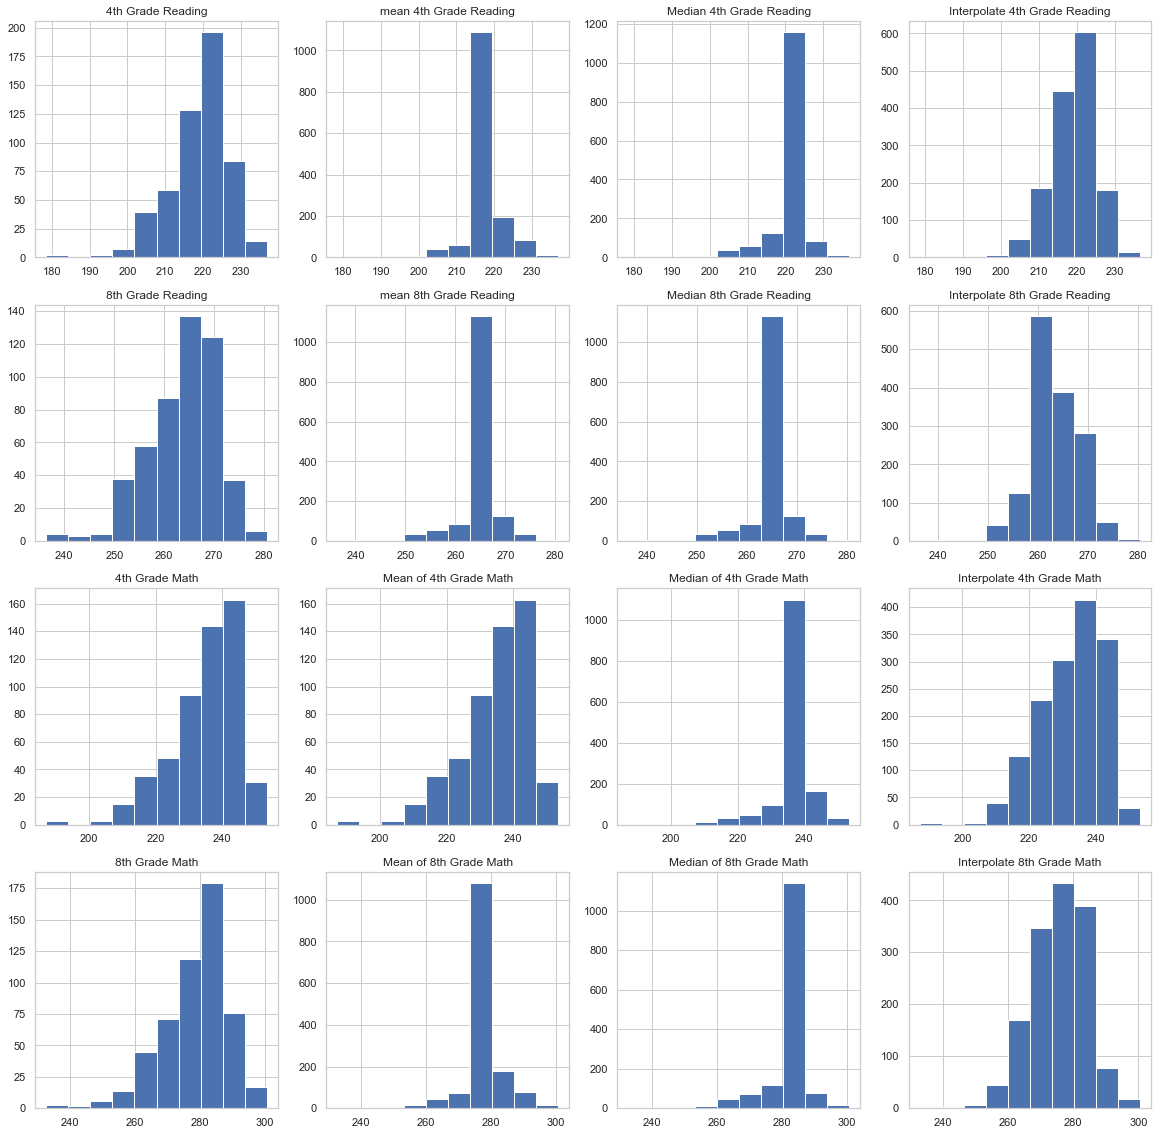

In [31]:
plt.figure(figsize = (20, 20))



##Reading
plt.subplot(4,4,1)
plt.hist(read4)
plt.title('{}'.format('4th Grade Reading'))

plt.subplot(4,4,2)
plt.hist(mean_read4)
plt.title('mean {}'.format('4th Grade Reading'))

plt.subplot(4,4,3)
plt.hist(med_read4)
plt.title('Median {}'.format('4th Grade Reading'))


plt.subplot(4,4,4)
plt.hist(int_read4)
plt.title('Interpolate {}'.format('4th Grade Reading'))

#8th grade reading

plt.subplot(4,4,5)
plt.hist(read8)
plt.title('{}'.format('8th Grade Reading'))

plt.subplot(4,4,6)
plt.hist(mean_read8)
plt.title('mean {}'.format('8th Grade Reading'))

plt.subplot(4,4,7)
plt.hist(med_read8)
plt.title('Median {}'.format('8th Grade Reading'))


plt.subplot(4,4,8)
plt.hist(int_read8)
plt.title('Interpolate {}'.format('8th Grade Reading'))





#4th grade math
plt.subplot(4,4,9)
plt.hist(math4)
plt.title('{}'.format('4th Grade Math'))

          
plt.subplot(4,4,10)
plt.hist(math4)
plt.title('Mean of {}'.format('4th Grade Math'))
          
          
          
plt.subplot(4,4,11)
plt.hist(med_math4)
plt.title('Median of {}'.format('4th Grade Math'))
          
          
          
plt.subplot(4,4,12)
plt.hist(int_math4)
plt.title('Interpolate {}'.format('4th Grade Math'))




#8th grade math
plt.subplot(4,4,13)
plt.hist(math8)
plt.title('{}'.format('8th Grade Math'))


plt.subplot(4,4,14)
plt.hist(mean_math8)
plt.title('Mean of {}'.format('8th Grade Math'))

          
          
plt.subplot(4,4,15)
plt.hist(med_math8)
plt.title('Median of {}'.format('8th Grade Math'))
          
          
          
plt.subplot(4,4,16)
plt.hist(int_math8)
plt.title('Interpolate {}'.format('8th Grade Math'))

